In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('HousePricePrediction.xlsx')

print(df.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [28]:
df.shape

(2919, 13)

In [29]:
obj = (df.dtypes=='object')
obj_cols = list(obj[obj].index)
print("Categorical data : ",len(obj_cols))

int_ = (df.dtypes == 'int64')
int_cols = list(int_[int_].index)
print("Integer data : ",len(int_cols))

fl = (df.dtypes=='float')
float_cols = list(fl[fl].index)
print("Float cols : ",len(float_cols))

Categorical data :  4
Integer data :  6
Float cols :  3


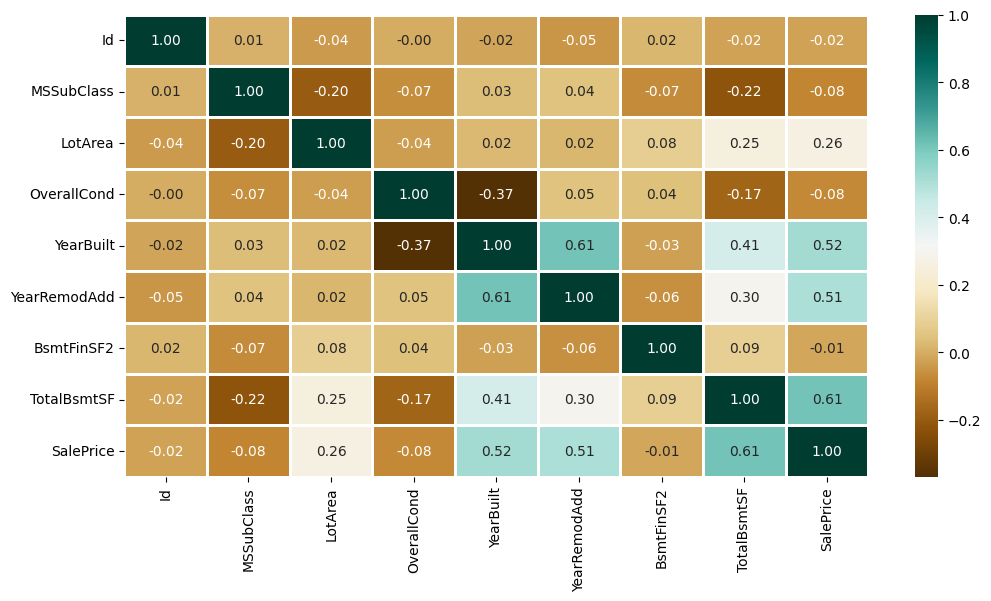

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),
           cmap='BrBG',
           fmt= '.2f',
           linewidth=2,
           annot=True )
plt.show()

<Axes: title={'center': 'no. unique values in categorical data'}>

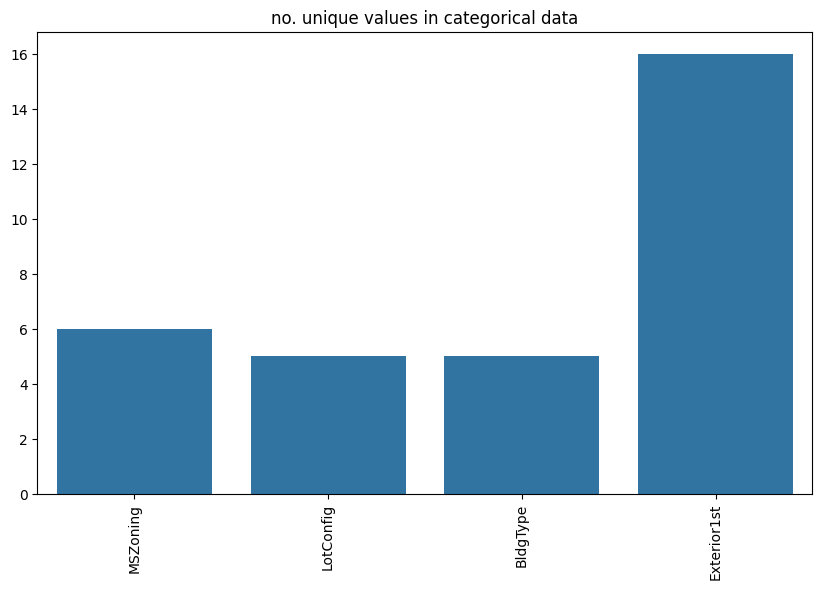

In [31]:
unique_value =[]

for col in obj_cols:
    unique_value.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('no. unique values in categorical data')
plt.xticks(rotation=90)
sns.barplot(x=obj_cols,y=unique_value)

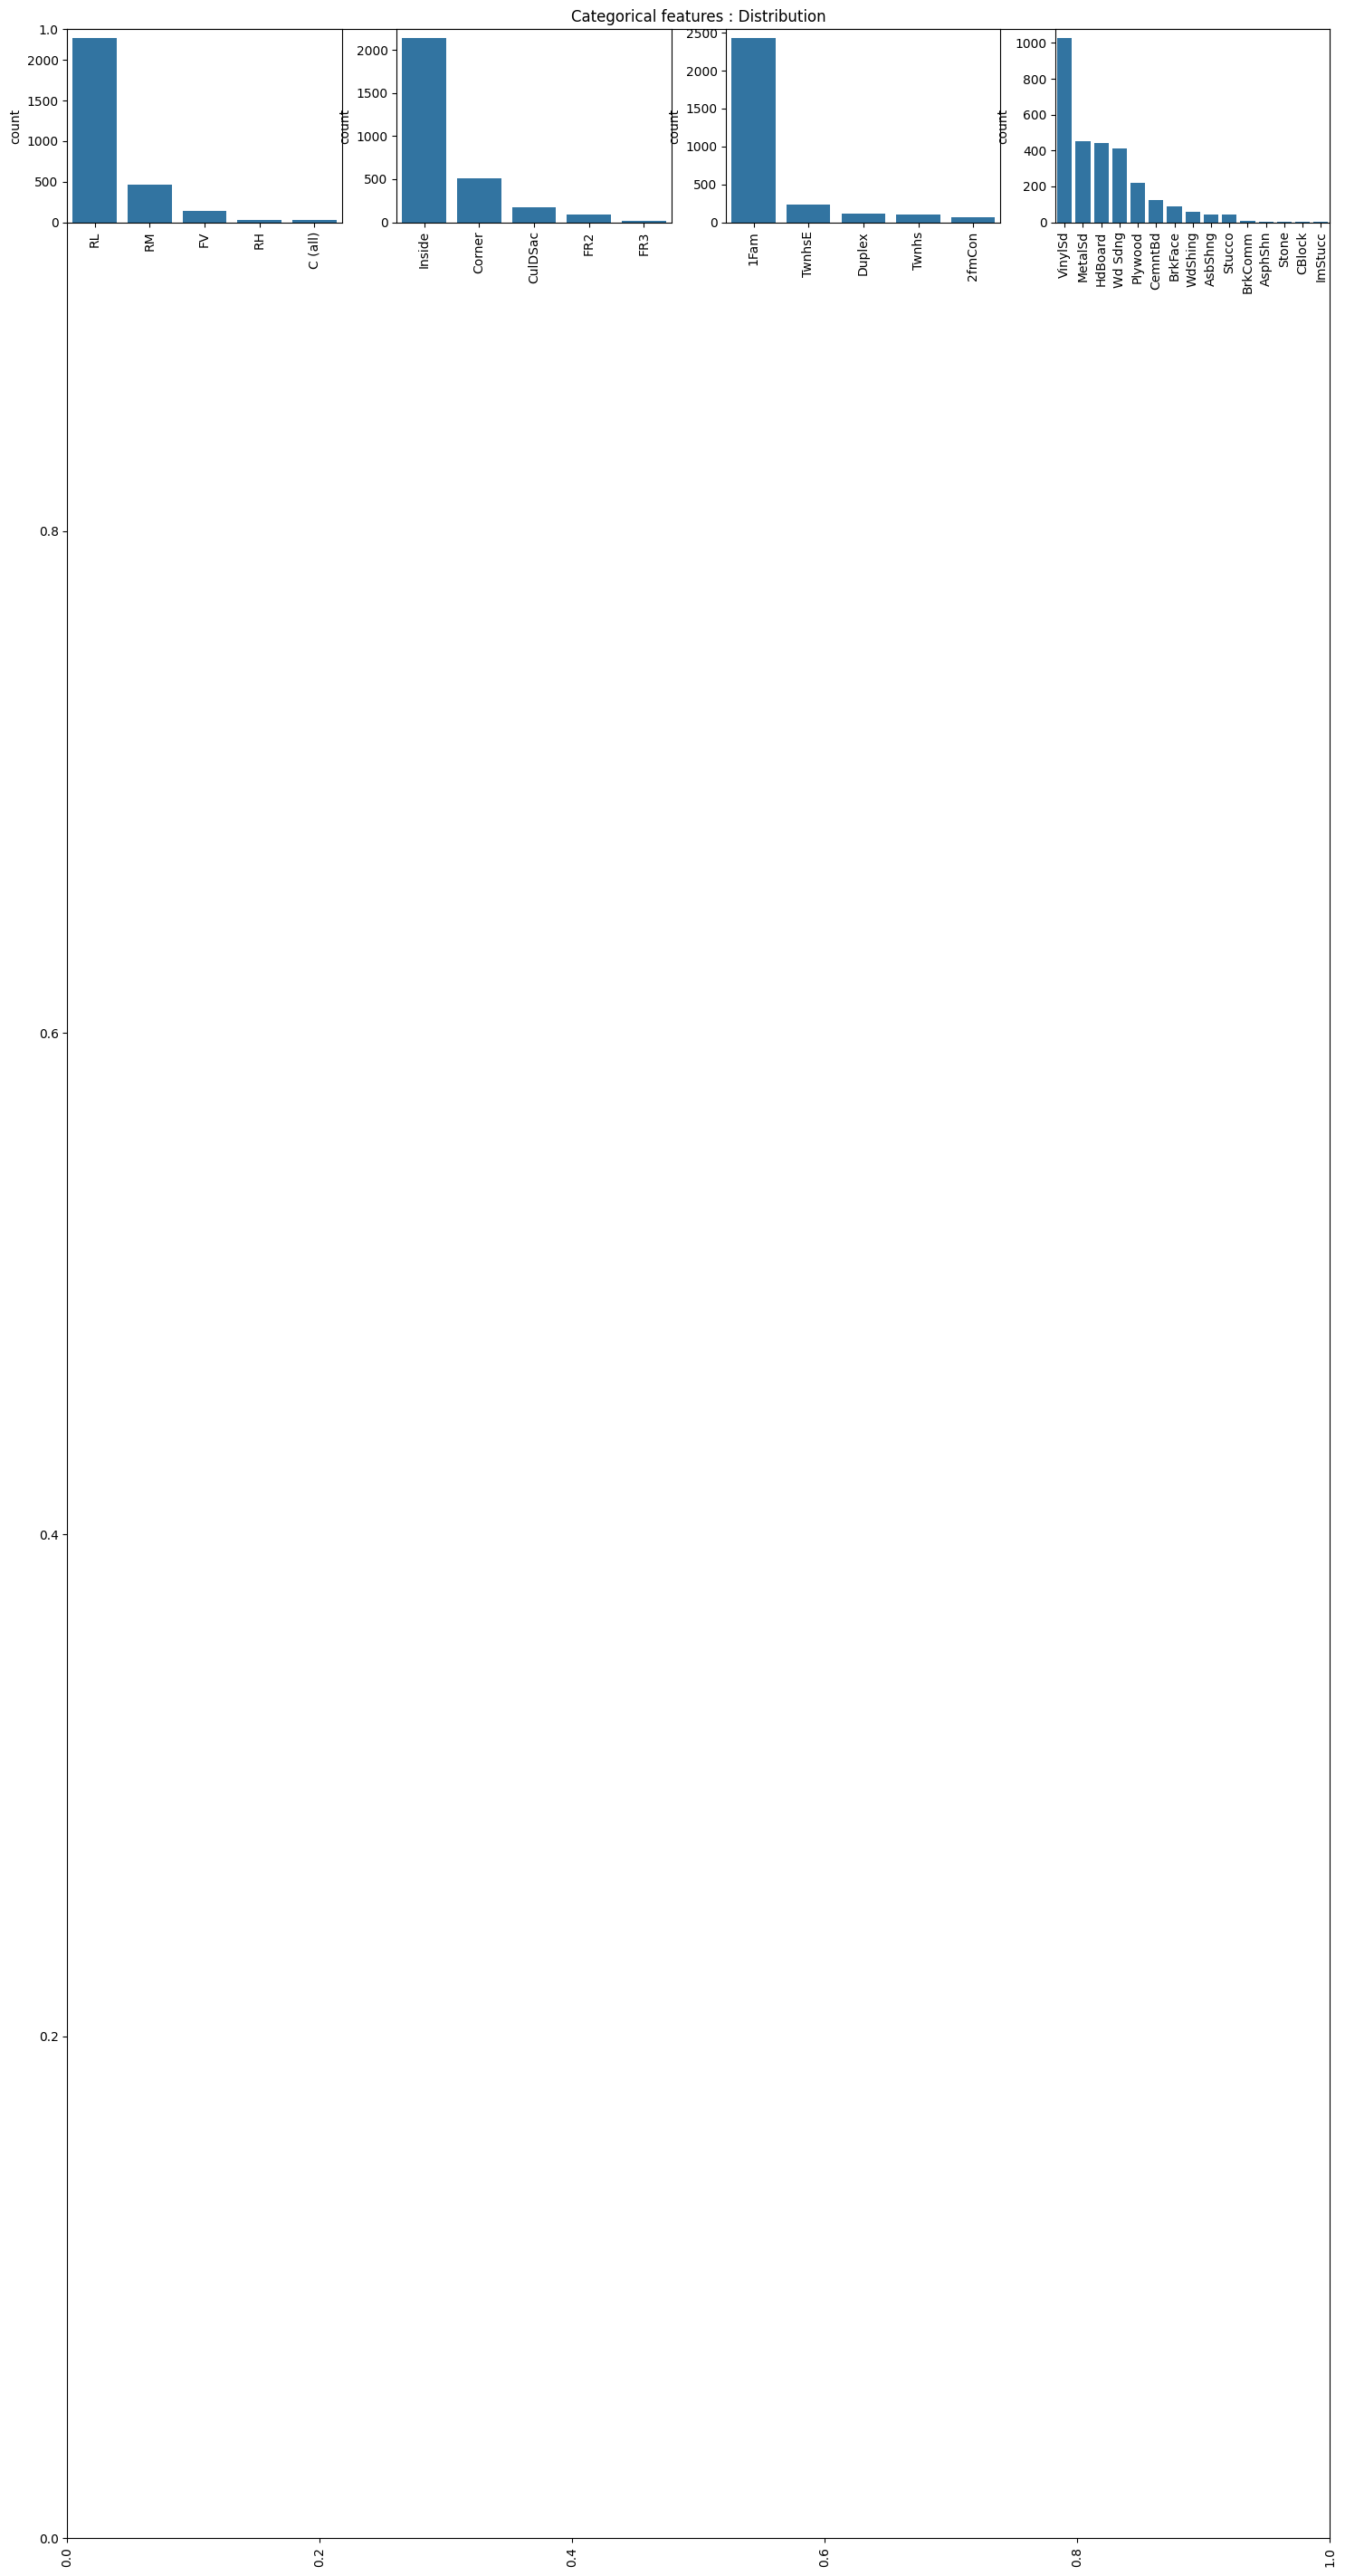

In [32]:
plt.figure(figsize=(18,36))
plt.title('Categorical features : Distribution')
plt.xticks(rotation=90)
index=1

for col in obj_cols:
    y=df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1



In [33]:
df.drop(['Id'],
       axis=1,
       inplace=True)

In [34]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [35]:
newdataset = df.dropna()

In [37]:
newdataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder

s = (newdataset.dtypes=='object')
obj_cols = list(s[s].index)
print('Categorical Variables : ')
print(obj_cols)
print('No. of Categorical Features : ')
len(obj_cols)

Categorical Variables : 
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of Categorical Features : 


4

In [49]:
OH_encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(newdataset[obj_cols]))
OH_cols.index = newdataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = newdataset.drop(obj_cols,axis=1)
df_final = pd.concat([df_final,OH_cols],axis=1)

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

x = df_final.drop(['SalePrice'],axis=1)
y = df_final['SalePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [51]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train,y_train)
y_pred = model_SVR.predict(x_test)

print(mean_absolute_percentage_error(y_test,y_pred))

0.1870512931870423


In [52]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train,y_train)
y_pred=model_RFR.predict(x_test)

mean_absolute_percentage_error(y_test,y_pred)

0.1915242271251882

In [53]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train,y_train)
y_pred = model_LR.predict(x_test)

mean_absolute_percentage_error(y_test,y_pred)

0.1874168384159988

In [55]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\socket.py", line 707, in readinto
    return self._sock.recv_into(b)
